In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [11]:
embark=df['Embarked'].value_counts()
embark

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

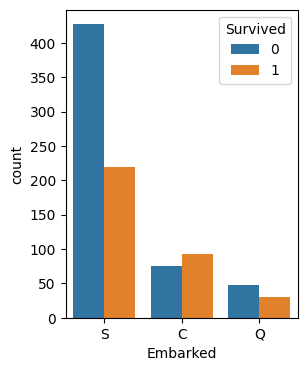

In [12]:
plt.figure(figsize=(3,4))
sns.countplot(x='Embarked', hue='Survived', data=df)

In [13]:
embark_percent= df['Embarked'].value_counts(normalize=True) * 100
embark_percent

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: proportion, dtype: float64

<Axes: xlabel='Embarked'>

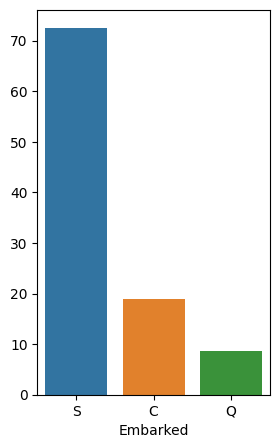

In [14]:
plt.figure(figsize=(3,5))
sns.barplot(x=embark_percent.index, y=embark_percent.values, hue=df['Embarked'].unique())

<Axes: >

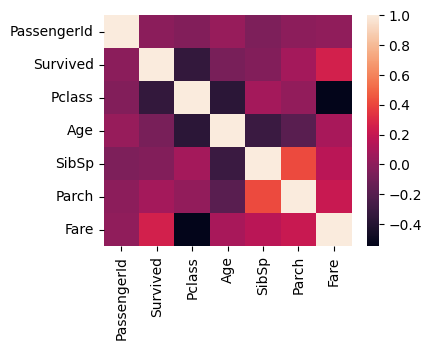

In [15]:
plt.figure(figsize=(4,3))
sns.heatmap(df.corr(numeric_only=True))

<Axes: xlabel='Survived', ylabel='count'>

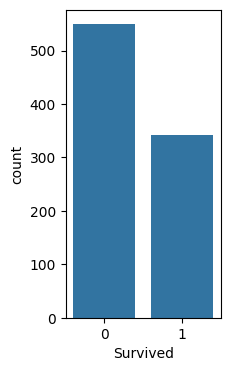

In [16]:
plt.figure(figsize=(2,4))
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Survived', ylabel='count'>

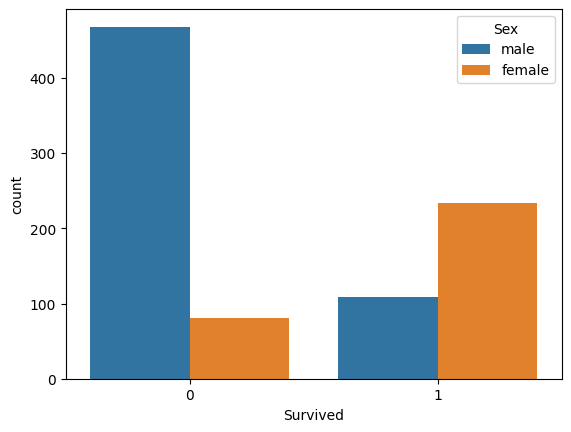

In [17]:
sns.countplot(x='Survived',hue='Sex', data=df)

In [20]:
Pclass_group = df.groupby(['Survived','Sex','Pclass'])['Age']
num = Pclass_group.apply(lambda x: x.isnull().sum())
num1 = Pclass_group.count()
print(num,'\n')
num1

Survived  Sex     Pclass
0         female  1          0
                  2          0
                  3         17
          male    1         16
                  2          7
                  3         85
1         female  1          9
                  2          2
                  3         25
          male    1          5
                  2          2
                  3          9
Name: Age, dtype: int64 



Survived  Sex     Pclass
0         female  1           3
                  2           6
                  3          55
          male    1          61
                  2          84
                  3         215
1         female  1          82
                  2          68
                  3          47
          male    1          40
                  2          15
                  3          38
Name: Age, dtype: int64

C:\Users\user_2\AppData\Local\Temp\ipykernel_13292\3766929378.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_pclass_counts = df.groupby(['AgeGroup', 'Pclass']).size().unstack()


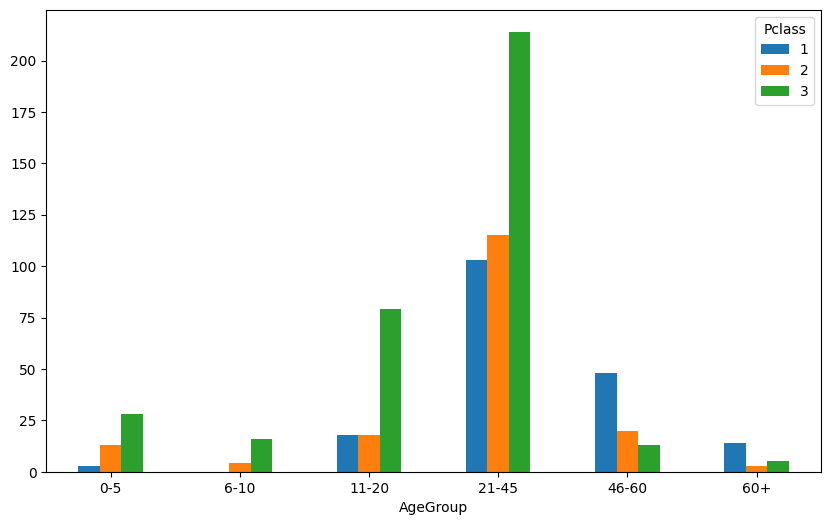

In [22]:
bins = [0,5,10,20,45,60,100]
labels = ['0-5','6-10','11-20','21-45','46-60','60+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
age_pclass_counts = df.groupby(['AgeGroup', 'Pclass']).size().unstack()
age_pclass_counts.plot(kind='bar', figsize=(10, 6))


plt.xticks(rotation=0)
plt.legend(title="Pclass")

plt.show()